In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import pearsonr, spearmanr

%matplotlib inline

In [2]:
#loading data
raw_happy2015_df=pd.read_csv("world_happiness/2015.csv")
raw_happy2016_df=pd.read_csv("world_happiness/2016.csv")
raw_happy2017_df=pd.read_csv("world_happiness/2017.csv")
raw_happy2018_df=pd.read_csv("world_happiness/2018.csv")
raw_happy2019_df=pd.read_csv("world_happiness/2019.csv")

#creating copies to preserve orginal dataframes
happy2015_df=raw_happy2015_df.copy()
happy2016_df=raw_happy2016_df.copy()
happy2017_df=raw_happy2017_df.copy()
happy2018_df=raw_happy2018_df.copy()
happy2019_df=raw_happy2019_df.copy()


In [3]:
happy2015_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
happy2015_df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
happy2016_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [6]:
happy2017_df.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [7]:
happy2017_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [8]:
happy2018_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [9]:
happy2018_df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [10]:
happy2019_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [11]:
happy2019_df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


## Data Cleaning For World Happiness Data

- Renaming columns (lowercase, remove spaces and replace with underscores, remove any other puncuntation)
- Removing countries that do not appear across all years
- Removing rows that have NaN values 
- Combine all years into master dataframe (combine this with Gini index afterwards)




## Cleaning columns for happy2015_df

In [12]:
#drop columns not in other dataframes
happy2015_df.drop(columns=['Region','Standard Error', 'Dystopia Residual'], inplace=True)

#making columns headings lowercase
happy2015_df.columns = happy2015_df.columns.str.lower()

#change column names to use underscore instead of spaces
columns = happy2015_df.columns

corrected_columns = []
for col in columns:
    col = col.replace('(','').replace(')','').replace(' ','_')
    corrected_columns.append(col)
    

#changing names of certain columns to be consisent with the rest of the dataframes
corrected_columns[3] = 'gdp_per_capita'
corrected_columns[4] = 'family_social_support'
    
happy2015_df.columns = corrected_columns

happy2015_df.columns

Index(['country', 'happiness_rank', 'happiness_score', 'gdp_per_capita',
       'family_social_support', 'health_life_expectancy', 'freedom',
       'trust_government_corruption', 'generosity'],
      dtype='object')

In [13]:
#adding a year column
happy2015_df.insert(loc=1, column='year', value=2015)
happy2015_df['year'] = happy2015_df['year'].astype(int)
happy2015_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country                      158 non-null    object 
 1   year                         158 non-null    int32  
 2   happiness_rank               158 non-null    int64  
 3   happiness_score              158 non-null    float64
 4   gdp_per_capita               158 non-null    float64
 5   family_social_support        158 non-null    float64
 6   health_life_expectancy       158 non-null    float64
 7   freedom                      158 non-null    float64
 8   trust_government_corruption  158 non-null    float64
 9   generosity                   158 non-null    float64
dtypes: float64(7), int32(1), int64(1), object(1)
memory usage: 11.9+ KB


## Cleaning columns for happy2016_df

In [14]:
#drop columns not in other dataframes
happy2016_df.drop(columns=['Region','Lower Confidence Interval','Upper Confidence Interval', 'Dystopia Residual'], inplace=True)

#making columns headings lowercase
happy2016_df.columns = happy2016_df.columns.str.lower()

#change column names to use underscore instead of spaces
columns = happy2016_df.columns

corrected_columns = []
for col in columns:
    col = col.replace('(','').replace(')','').replace(' ','_')
    corrected_columns.append(col)
    

#changing names of certain columns to be consisent with the rest of the dataframes
corrected_columns[3] = 'gdp_per_capita'
corrected_columns[4] = 'family_social_support'
    
happy2016_df.columns = corrected_columns

happy2016_df.columns

Index(['country', 'happiness_rank', 'happiness_score', 'gdp_per_capita',
       'family_social_support', 'health_life_expectancy', 'freedom',
       'trust_government_corruption', 'generosity'],
      dtype='object')

In [15]:
#adding a year column
happy2016_df.insert(loc=1, column='year', value=2016)
happy2016_df['year'] = happy2016_df['year'].astype(int)
happy2016_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country                      157 non-null    object 
 1   year                         157 non-null    int32  
 2   happiness_rank               157 non-null    int64  
 3   happiness_score              157 non-null    float64
 4   gdp_per_capita               157 non-null    float64
 5   family_social_support        157 non-null    float64
 6   health_life_expectancy       157 non-null    float64
 7   freedom                      157 non-null    float64
 8   trust_government_corruption  157 non-null    float64
 9   generosity                   157 non-null    float64
dtypes: float64(7), int32(1), int64(1), object(1)
memory usage: 11.8+ KB


## Cleaning columns for happy2017_df

In [16]:
#drop columns not in other dataframes
happy2017_df.drop(columns=['Whisker.high','Whisker.low', 'Dystopia.Residual'], inplace=True)

#making columns headings lowercase
happy2017_df.columns = happy2017_df.columns.str.lower()

#change column names to use underscore instead of spaces
columns = happy2017_df.columns

corrected_columns = []
for col in columns:
    col = col.replace('..','.').replace('.','_')
    corrected_columns.append(col)
    

#changing names of certain columns to be consisent with the rest of the dataframes
corrected_columns[3] = 'gdp_per_capita'
corrected_columns[4] = 'family_social_support'
corrected_columns[5] = 'health_life_expectancy'
corrected_columns[8] = 'trust_government_corruption'
    
happy2017_df.columns = corrected_columns

happy2017_df.columns

Index(['country', 'happiness_rank', 'happiness_score', 'gdp_per_capita',
       'family_social_support', 'health_life_expectancy', 'freedom',
       'generosity', 'trust_government_corruption'],
      dtype='object')

In [17]:
#adding a year column
happy2017_df.insert(loc=1, column='year', value=2017)
happy2017_df['year'] = happy2017_df['year'].astype(int)
happy2017_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country                      155 non-null    object 
 1   year                         155 non-null    int32  
 2   happiness_rank               155 non-null    int64  
 3   happiness_score              155 non-null    float64
 4   gdp_per_capita               155 non-null    float64
 5   family_social_support        155 non-null    float64
 6   health_life_expectancy       155 non-null    float64
 7   freedom                      155 non-null    float64
 8   generosity                   155 non-null    float64
 9   trust_government_corruption  155 non-null    float64
dtypes: float64(7), int32(1), int64(1), object(1)
memory usage: 11.6+ KB


## Cleaning columns for happy2018_df

In [18]:
#making columns headings lowercase
happy2018_df.columns = happy2018_df.columns.str.lower()

#change column names to use underscore instead of spaces
columns = happy2018_df.columns

corrected_columns = []
for col in columns:
    col = col.replace(' ','_')
    corrected_columns.append(col)
    

#changing names of certain columns to be consisent with the rest of the dataframes
corrected_columns[0] = 'happiness_rank'
corrected_columns[1] = 'country'
corrected_columns[2] = 'happiness_score'
corrected_columns[4] = 'family_social_support'
corrected_columns[5] = 'health_life_expectancy'
corrected_columns[6] = 'freedom'
corrected_columns[8] = 'trust_government_corruption'
    
happy2018_df.columns = corrected_columns

happy2018_df.columns

Index(['happiness_rank', 'country', 'happiness_score', 'gdp_per_capita',
       'family_social_support', 'health_life_expectancy', 'freedom',
       'generosity', 'trust_government_corruption'],
      dtype='object')

In [19]:
#adding a year column
happy2018_df.insert(loc=1, column='year', value=2018)
happy2018_df['year'] = happy2018_df['year'].astype(int)
happy2018_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   happiness_rank               156 non-null    int64  
 1   year                         156 non-null    int32  
 2   country                      156 non-null    object 
 3   happiness_score              156 non-null    float64
 4   gdp_per_capita               156 non-null    float64
 5   family_social_support        156 non-null    float64
 6   health_life_expectancy       156 non-null    float64
 7   freedom                      156 non-null    float64
 8   generosity                   156 non-null    float64
 9   trust_government_corruption  155 non-null    float64
dtypes: float64(7), int32(1), int64(1), object(1)
memory usage: 11.7+ KB


## Cleaning columns for happy2019_df

In [20]:
#making columns headings lowercase
happy2019_df.columns = happy2019_df.columns.str.lower()

#change column names to use underscore instead of spaces
columns = happy2019_df.columns

corrected_columns = []
for col in columns:
    col = col.replace(' ','_')
    corrected_columns.append(col)
    

#changing names of certain columns to be consisent with the rest of the dataframes
corrected_columns[0] = 'happiness_rank'
corrected_columns[1] = 'country'
corrected_columns[2] = 'happiness_score'
corrected_columns[4] = 'family_social_support'
corrected_columns[5] = 'health_life_expectancy'
corrected_columns[6] = 'freedom'
corrected_columns[8] = 'trust_government_corruption'
    
happy2019_df.columns = corrected_columns

happy2019_df.columns

Index(['happiness_rank', 'country', 'happiness_score', 'gdp_per_capita',
       'family_social_support', 'health_life_expectancy', 'freedom',
       'generosity', 'trust_government_corruption'],
      dtype='object')

In [21]:
#adding a year column
happy2019_df.insert(loc=1, column='year', value=2019)
happy2019_df['year'] = happy2019_df['year'].astype(int)
happy2019_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   happiness_rank               156 non-null    int64  
 1   year                         156 non-null    int32  
 2   country                      156 non-null    object 
 3   happiness_score              156 non-null    float64
 4   gdp_per_capita               156 non-null    float64
 5   family_social_support        156 non-null    float64
 6   health_life_expectancy       156 non-null    float64
 7   freedom                      156 non-null    float64
 8   generosity                   156 non-null    float64
 9   trust_government_corruption  156 non-null    float64
dtypes: float64(7), int32(1), int64(1), object(1)
memory usage: 11.7+ KB


## Cleaning rows

 - All dataframes now have the same amount of columns and the names are consisent. 
 - Now the countries need to be consistent across all data frames.
 - NaN values need to be dropped. (Only applies to happy2018_df)

## Cleaning rows from happy2015_df and happy2017_df

In [22]:
# Turning country columns to sets to make it easier to determine differences between them
countries_2017 = set(happy2017_df['country'].sort_values())
countries_2015 = set(happy2015_df['country'].sort_values())

#comparing each set to the countries_2017 set since it contains the least amount of items
non_matches = countries_2017 ^ countries_2015

#differences between the dataframes
non_matches

{'Belize',
 'Comoros',
 'Djibouti',
 'Hong Kong',
 'Hong Kong S.A.R., China',
 'Laos',
 'Namibia',
 'Oman',
 'Somalia',
 'Somaliland region',
 'South Sudan',
 'Suriname',
 'Swaziland',
 'Taiwan',
 'Taiwan Province of China'}

In [23]:
#changing the values of the countries that are the same, but have a different spelling (Checking for false positives)
happy2017_df.loc[happy2017_df['country'].str.contains('Hong')]

#using .at to select value
happy2017_df.at[70, "country"] = 'Hong Kong'
print(happy2017_df.at[70, "country"])

Hong Kong


In [24]:
happy2017_df.loc[happy2017_df['country'].str.contains('Tai')]

#using .at to select value
happy2017_df.at[32, "country"] = 'Taiwan'
print(happy2017_df.at[32, "country"] )

Taiwan


In [25]:
#running the set operation a second time
countries_2017 = set(happy2017_df['country'].sort_values())
countries_2015 = set(happy2015_df['country'].sort_values())

non_matches = countries_2017 ^ countries_2015

#remoing countries in no_matches from the dataframes
non_matches = list(non_matches)
print(non_matches)

happy2017_df = happy2017_df.loc[~happy2017_df['country'].isin(non_matches)]
happy2015_df = happy2015_df.loc[~happy2015_df['country'].isin(non_matches)]

#Also going to remove these from the rest of the dataframes
happy2016_df = happy2016_df.loc[~happy2016_df['country'].isin(non_matches)]
happy2018_df = happy2018_df.loc[~happy2018_df['country'].isin(non_matches)]
happy2019_df = happy2019_df.loc[~happy2019_df['country'].isin(non_matches)]

['Somaliland region', 'Suriname', 'Swaziland', 'Comoros', 'South Sudan', 'Laos', 'Djibouti', 'Somalia', 'Oman', 'Namibia', 'Belize']


In [26]:
#running set operation one last time to make sure that rows are the same
countries_2017 = set(happy2017_df['country'].sort_values())
countries_2015 = set(happy2015_df['country'].sort_values())

non_matches = countries_2017 ^ countries_2015
print(non_matches,len(happy2015_df), len(happy2017_df))

set() 151 151


## Cleaning rows from happy2016_df

In [27]:
# Turning country columns to sets to make it easier to determine differences between them
countries_2016 = set(happy2016_df['country'].sort_values())

#comparing each set to the countries_2017 set since it contains the least amount of items
non_matches = countries_2017 ^ countries_2016

#differences between the dataframes
non_matches

{'Central African Republic',
 'Lesotho',
 'Mozambique',
 'Puerto Rico',
 'Somaliland Region'}

In [28]:
#remoing countries in no_matches from the dataframes (checked for false positives, but did not find any)
non_matches = list(non_matches)
print(non_matches)

happy2017_df = happy2017_df.loc[~happy2017_df['country'].isin(non_matches)]
happy2015_df = happy2015_df.loc[~happy2015_df['country'].isin(non_matches)]

#Also going to remove these from the rest of the dataframes
happy2016_df = happy2016_df.loc[~happy2016_df['country'].isin(non_matches)]
happy2018_df = happy2018_df.loc[~happy2018_df['country'].isin(non_matches)]
happy2019_df = happy2019_df.loc[~happy2019_df['country'].isin(non_matches)]


['Somaliland Region', 'Lesotho', 'Central African Republic', 'Puerto Rico', 'Mozambique']


In [29]:
#running set operation one last time to make sure that rows are the same
countries_2017 = set(happy2017_df['country'].sort_values())
countries_2016 = set(happy2016_df['country'].sort_values())

non_matches = countries_2017 ^ countries_2016
print(non_matches,len(happy2016_df), len(happy2017_df))

set() 148 148


## Cleaning rows from happy2018_df

In [30]:
#Dropping row with NaN
happy2018_df.dropna(inplace=True)
happy2018_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 155
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   happiness_rank               147 non-null    int64  
 1   year                         147 non-null    int32  
 2   country                      147 non-null    object 
 3   happiness_score              147 non-null    float64
 4   gdp_per_capita               147 non-null    float64
 5   family_social_support        147 non-null    float64
 6   health_life_expectancy       147 non-null    float64
 7   freedom                      147 non-null    float64
 8   generosity                   147 non-null    float64
 9   trust_government_corruption  147 non-null    float64
dtypes: float64(7), int32(1), int64(1), object(1)
memory usage: 12.1+ KB


In [31]:
#Turning country columns to sets to make it easier to determine differences between them
countries_2018 = set(happy2018_df['country'].sort_values())

#comparing each set to the countries_2017 set since it contains the least amount of items
non_matches = countries_2017 ^ countries_2018

#differences between the dataframes
non_matches

{'North Cyprus',
 'Northern Cyprus',
 'Trinidad & Tobago',
 'Trinidad and Tobago',
 'United Arab Emirates'}

In [32]:
#changing the values of the countries that are the same, but have a different spelling (Checking for false positives)
happy2017_df.loc[happy2017_df['country'].str.contains('Cypru')]

#using .at to select value
happy2017_df.at[60, "country"] = 'Northern Cyprus'
print(happy2017_df.at[60, "country"])

Northern Cyprus


In [33]:
#changing the values of the countries that are the same, but have a different spelling (Checking for false positives)
happy2018_df.loc[happy2018_df['country'].str.contains('Toba')]

#using .at to select value
happy2018_df.at[37, "country"] = 'Trinidad and Tobago'
print(happy2017_df.at[37, "country"])

Trinidad and Tobago


In [34]:
#remoing countries in no_matches from the dataframes
non_matches = list(non_matches)
print(non_matches)

happy2017_df = happy2017_df.loc[~happy2017_df['country'].isin(non_matches)]
happy2015_df = happy2015_df.loc[~happy2015_df['country'].isin(non_matches)]

#Also going to remove these from the rest of the dataframes
happy2016_df = happy2016_df.loc[~happy2016_df['country'].isin(non_matches)]
happy2018_df = happy2018_df.loc[~happy2018_df['country'].isin(non_matches)]
happy2019_df = happy2019_df.loc[~happy2019_df['country'].isin(non_matches)]

['Northern Cyprus', 'United Arab Emirates', 'Trinidad and Tobago', 'Trinidad & Tobago', 'North Cyprus']


In [35]:
#running set operation one last time to make sure that rows are the same
countries_2017 = set(happy2017_df['country'].sort_values())
countries_2018 = set(happy2018_df['country'].sort_values())

non_matches = countries_2017 ^ countries_2018
print(non_matches,len(happy2018_df), len(happy2017_df))

set() 145 145


## Cleaning rows from happy2019_df

In [36]:
#Turning country columns to sets to make it easier to determine differences between them
countries_2019 = set(happy2019_df['country'].sort_values())

#comparing each set to the countries_2017 set since it contains the least amount of items
non_matches = countries_2017 ^ countries_2019

#differences between the dataframes
non_matches

{'Angola', 'Gambia', 'Macedonia', 'North Macedonia', 'Sudan'}

In [37]:
#changing the values of the countries that are the same, but have a different spelling (Checking for false positives)
happy2019_df.loc[happy2019_df['country'].str.contains('Toba')]

#using .at to select value
happy2019_df.at[38, "country"] = 'Trinidad and Tobago'
print(happy2019_df.at[38, "country"])


Trinidad and Tobago


In [38]:
#running the set operation a second time
countries_2017 = set(happy2017_df['country'].sort_values())
countries_2019 = set(happy2019_df['country'].sort_values())

non_matches = countries_2017 ^ countries_2019

#remoing countries in no_matches from the dataframes
non_matches = list(non_matches)
print(non_matches)

happy2017_df = happy2017_df.loc[~happy2017_df['country'].isin(non_matches)]
happy2015_df = happy2015_df.loc[~happy2015_df['country'].isin(non_matches)]

#Also going to remove these from the rest of the dataframes
happy2016_df = happy2016_df.loc[~happy2016_df['country'].isin(non_matches)]
happy2018_df = happy2018_df.loc[~happy2018_df['country'].isin(non_matches)]
happy2019_df = happy2019_df.loc[~happy2019_df['country'].isin(non_matches)]

['Macedonia', 'Gambia', 'North Macedonia', 'Sudan', 'Trinidad and Tobago', 'Angola']


In [39]:
#running set operation one last time to make sure that rows are the same
countries_2017 = set(happy2017_df['country'].sort_values())
countries_2019 = set(happy2019_df['country'].sort_values())

non_matches = countries_2017 ^ countries_2019
print(non_matches,len(happy2019_df), len(happy2017_df))

set() 142 142


## Final row cleanup

In [40]:
#Going through to compare sets again
countries_2015 = set(happy2015_df['country'].sort_values())
countries_2017 = set(happy2017_df['country'].sort_values())

non_matches = countries_2017 ^ countries_2015
print(non_matches)


set()


In [41]:
#Going through to compare sets again
countries_2016 = set(happy2016_df['country'].sort_values())
non_matches = countries_2017 ^ countries_2016
print(non_matches)

set()


In [42]:
countries_2016 = set(happy2016_df['country'].sort_values())
non_matches = countries_2017 ^ countries_2016
print(non_matches)

set()


In [43]:
#Going through to compare sets again
countries_2018 = set(happy2018_df['country'].sort_values())
non_matches = countries_2017 ^ countries_2018
print(non_matches)

set()


In [44]:
#Going through to compare sets again
countries_2019 = set(happy2019_df['country'].sort_values())
non_matches = countries_2017 ^ countries_2019
print(non_matches)

set()


## Combining dataframes into master dataframe

In [45]:
#Combining dataframes into one
happy_master_df = pd.concat([happy2015_df, happy2016_df, happy2017_df, happy2018_df, happy2019_df], ignore_index=True)

happy_master_df.head()

,country,year,happiness_rank,happiness_score,gdp_per_capita,family_social_support,health_life_expectancy,freedom,trust_government_corruption,generosity
0,Switzerland,2015.0,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,2015.0,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,2015.0,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,2015.0,4.0,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,2015.0,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [46]:
happy_master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710 entries, 0 to 709
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country                      710 non-null    object 
 1   year                         710 non-null    float64
 2   happiness_rank               710 non-null    float64
 3   happiness_score              710 non-null    float64
 4   gdp_per_capita               710 non-null    float64
 5   family_social_support        710 non-null    float64
 6   health_life_expectancy       710 non-null    float64
 7   freedom                      710 non-null    float64
 8   trust_government_corruption  710 non-null    float64
 9   generosity                   710 non-null    float64
dtypes: float64(9), object(1)
memory usage: 55.6+ KB


In [47]:
#correcting data type for 
happy_master_df['year'] = happy_master_df['year'].astype(int)
happy_master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710 entries, 0 to 709
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country                      710 non-null    object 
 1   year                         710 non-null    int32  
 2   happiness_rank               710 non-null    float64
 3   happiness_score              710 non-null    float64
 4   gdp_per_capita               710 non-null    float64
 5   family_social_support        710 non-null    float64
 6   health_life_expectancy       710 non-null    float64
 7   freedom                      710 non-null    float64
 8   trust_government_corruption  710 non-null    float64
 9   generosity                   710 non-null    float64
dtypes: float64(8), int32(1), object(1)
memory usage: 52.8+ KB


## Data Cleaning For Ginni Index and Other World Development Indicators For Income 

- Renaming columns (lowercase, remove spaces and replace with underscores, remove any other puncuntation)
- Removing countries that do not appear across all years
- Removing rows with NaN values 
- Transform each unique value in Series Name to its own column
- Transform each year column into its own row
- Combine the dataframe with master dataframe for world happiness

In [48]:
#loading the data
gini_income_raw = pd.read_csv('income_data/world_bank_income_data.csv')

#Saving copy of gini_index_raw to preserve data
gini_income = gini_income_raw.copy()

gini_income.head()

,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
0,Gini index,SI.POV.GINI,Afghanistan,AFG,..,..,..,..,..,..,..,..,..,..,..,..
1,Gini index,SI.POV.GINI,Albania,ALB,..,..,29,..,34.6,32.8,33.7,33.1,30.1,30.8,..,..
2,Gini index,SI.POV.GINI,Algeria,DZA,..,..,..,..,..,..,..,..,..,..,..,..
3,Gini index,SI.POV.GINI,American Samoa,ASM,..,..,..,..,..,..,..,..,..,..,..,..
4,Gini index,SI.POV.GINI,Andorra,AND,..,..,..,..,..,..,..,..,..,..,..,..


In [49]:
gini_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Series Name    3194 non-null   object
 1   Series Code    3192 non-null   object
 2   Country Name   3192 non-null   object
 3   Country Code   3192 non-null   object
 4   1990 [YR1990]  3192 non-null   object
 5   2000 [YR2000]  3192 non-null   object
 6   2012 [YR2012]  3192 non-null   object
 7   2013 [YR2013]  3192 non-null   object
 8   2014 [YR2014]  3192 non-null   object
 9   2015 [YR2015]  3192 non-null   object
 10  2016 [YR2016]  3192 non-null   object
 11  2017 [YR2017]  3192 non-null   object
 12  2018 [YR2018]  3192 non-null   object
 13  2019 [YR2019]  3192 non-null   object
 14  2020 [YR2020]  3192 non-null   object
 15  2021 [YR2021]  3192 non-null   object
dtypes: object(16)
memory usage: 399.8+ KB


## Cleaning up column names

In [50]:
#removing everything before 2015
gini_income.drop(gini_income.iloc[:, 4:9], inplace=True, axis=1)

#removing everything after 2019
gini_income.drop(gini_income.iloc[:, 9:], inplace=True, axis=1)

gini_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Series Name    3194 non-null   object
 1   Series Code    3192 non-null   object
 2   Country Name   3192 non-null   object
 3   Country Code   3192 non-null   object
 4   2015 [YR2015]  3192 non-null   object
 5   2016 [YR2016]  3192 non-null   object
 6   2017 [YR2017]  3192 non-null   object
 7   2018 [YR2018]  3192 non-null   object
 8   2019 [YR2019]  3192 non-null   object
dtypes: object(9)
memory usage: 224.9+ KB


In [51]:
#making columns headings lowercase
gini_income.columns = gini_income.columns.str.lower()

#change column names to use underscore instead of spaces
columns = gini_income.columns

corrected_columns = []
for col in columns:
    col = col.replace('[yr201','').replace(' ','_')
    corrected_columns.append(col)
    
    
#changing names of certain columns to be consisent with the rest of the dataframes
corrected_columns[0] = 'income_indicator'
corrected_columns[1] = 'income_indicator_code'
corrected_columns[2] = 'country'
corrected_columns[4] = '2015'
corrected_columns[5] = '2016'
corrected_columns[6] = '2017'
corrected_columns[7] = '2018'
corrected_columns[8] = '2019' 

    
gini_income.columns = corrected_columns

gini_income.columns

Index(['income_indicator', 'income_indicator_code', 'country', 'country_code',
       '2015', '2016', '2017', '2018', '2019'],
      dtype='object')

## Cleaning rows

In [52]:
gini_income.head()

,income_indicator,income_indicator_code,country,country_code,2015,2016,2017,2018,2019
0,Gini index,SI.POV.GINI,Afghanistan,AFG,..,..,..,..,..
1,Gini index,SI.POV.GINI,Albania,ALB,32.8,33.7,33.1,30.1,30.8
2,Gini index,SI.POV.GINI,Algeria,DZA,..,..,..,..,..
3,Gini index,SI.POV.GINI,American Samoa,ASM,..,..,..,..,..
4,Gini index,SI.POV.GINI,Andorra,AND,..,..,..,..,..


In [53]:
#Replacing '..' value with blank value
gini_income['2015'] = gini_income['2015'].str.replace('..', '', regex=False)
gini_income['2015'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3197 entries, 0 to 3196
Series name: 2015
Non-Null Count  Dtype 
--------------  ----- 
3192 non-null   object
dtypes: object(1)
memory usage: 25.1+ KB


In [54]:
#Replacing '..' value with blank value
gini_income['2016'] = gini_income['2016'].str.replace('..', '', regex=False)
gini_income['2016'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3197 entries, 0 to 3196
Series name: 2016
Non-Null Count  Dtype 
--------------  ----- 
3192 non-null   object
dtypes: object(1)
memory usage: 25.1+ KB


In [55]:
#Replacing '..' value with blank value
gini_income['2017'] = gini_income['2017'].str.replace('..', '', regex=False)
gini_income['2017'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3197 entries, 0 to 3196
Series name: 2017
Non-Null Count  Dtype 
--------------  ----- 
3192 non-null   object
dtypes: object(1)
memory usage: 25.1+ KB


In [56]:
#Replacing '..' value with blank value
gini_income['2018'] = gini_income['2018'].str.replace('..', '', regex=False)
gini_income['2018'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3197 entries, 0 to 3196
Series name: 2018
Non-Null Count  Dtype 
--------------  ----- 
3192 non-null   object
dtypes: object(1)
memory usage: 25.1+ KB


In [57]:
#Replacing '..' value with blank value
gini_income['2019'] = gini_income['2019'].str.replace('..', '', regex=False)
gini_income['2019'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3197 entries, 0 to 3196
Series name: 2019
Non-Null Count  Dtype 
--------------  ----- 
3192 non-null   object
dtypes: object(1)
memory usage: 25.1+ KB


In [58]:
#using mask to replace blank values with NaN
gini_income = gini_income.mask(gini_income == '')

gini_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   income_indicator       3194 non-null   object
 1   income_indicator_code  3192 non-null   object
 2   country                3192 non-null   object
 3   country_code           3192 non-null   object
 4   2015                   1510 non-null   object
 5   2016                   1447 non-null   object
 6   2017                   1400 non-null   object
 7   2018                   1472 non-null   object
 8   2019                   1238 non-null   object
dtypes: object(9)
memory usage: 224.9+ KB


In [59]:
#dropping all NaN values
gini_income.dropna(inplace=True)
gini_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1167 entries, 1 to 3133
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   income_indicator       1167 non-null   object
 1   income_indicator_code  1167 non-null   object
 2   country                1167 non-null   object
 3   country_code           1167 non-null   object
 4   2015                   1167 non-null   object
 5   2016                   1167 non-null   object
 6   2017                   1167 non-null   object
 7   2018                   1167 non-null   object
 8   2019                   1167 non-null   object
dtypes: object(9)
memory usage: 91.2+ KB


In [60]:
#Correcting data type for 2015,2016, 2017, 2018, and 2019 columns
gini_income['2015'] = gini_income['2015'].astype(float)
gini_income['2016'] = gini_income['2016'].astype(float)
gini_income['2017'] = gini_income['2017'].astype(float)
gini_income['2018'] = gini_income['2018'].astype(float)
gini_income['2019'] = gini_income['2019'].astype(float)

gini_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1167 entries, 1 to 3133
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   income_indicator       1167 non-null   object 
 1   income_indicator_code  1167 non-null   object 
 2   country                1167 non-null   object 
 3   country_code           1167 non-null   object 
 4   2015                   1167 non-null   float64
 5   2016                   1167 non-null   float64
 6   2017                   1167 non-null   float64
 7   2018                   1167 non-null   float64
 8   2019                   1167 non-null   float64
dtypes: float64(5), object(4)
memory usage: 91.2+ KB


In [61]:
gini_income.head()

,income_indicator,income_indicator_code,country,country_code,2015,2016,2017,2018,2019
1,Gini index,SI.POV.GINI,Albania,ALB,32.8,33.7,33.1,30.1,30.8
8,Gini index,SI.POV.GINI,Armenia,ARM,32.4,32.5,33.6,34.4,29.9
11,Gini index,SI.POV.GINI,Austria,AUT,30.5,30.8,29.7,30.8,30.2
17,Gini index,SI.POV.GINI,Belarus,BLR,25.6,25.3,25.4,25.2,25.3
18,Gini index,SI.POV.GINI,Belgium,BEL,27.7,27.6,27.4,27.2,27.2


In [62]:
#matching countries to the ones in the Happy_master_df

gini_countries = set(gini_income['country'].values)
happy_countries = set(happy_master_df['country'].values)

non_matches = gini_countries ^ happy_countries

non_matches

{'Africa Eastern and Southern',
 'Africa Western and Central',
 'Angola',
 'Arab World',
 'Bahamas, The',
 'Barbados',
 'Belize',
 'Brunei Darussalam',
 'Cabo Verde',
 'Caribbean small states',
 'Central African Republic',
 'Central Europe and the Baltics',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Djibouti',
 'Dominica',
 'Early-demographic dividend',
 'East Asia & Pacific',
 'East Asia & Pacific (IDA & IBRD countries)',
 'East Asia & Pacific (excluding high income)',
 'Egypt',
 'Egypt, Arab Rep.',
 'Equatorial Guinea',
 'Eswatini',
 'Euro area',
 'Europe & Central Asia',
 'Europe & Central Asia (IDA & IBRD countries)',
 'Europe & Central Asia (excluding high income)',
 'European Union',
 'Fiji',
 'Fragile and conflict affected situations',
 'Gambia, The',
 'Guinea-Bissau',
 'Guyana',
 'Heavily indebted poor countries (HIPC)',
 'High income',
 'Hong Kong',
 'IBRD only',
 'IDA & IBRD total',
 'IDA blend',
 'IDA onl

In [63]:
#changing the values of the countries that are the same, but have a different spelling (Checking for false positives)
gini_income.loc[gini_income['country'].str.contains('Russ')]


#changing country value
gini_income['country'] = gini_income['country'].str.replace('Russian Federation', 'Russia', regex=False)
gini_income.loc[gini_income['country'].str.contains('Russ')]



,income_indicator,income_indicator_code,country,country_code,2015,2016,2017,2018,2019
161,Gini index,SI.POV.GINI,Russia,RUS,3.770000e+01,3.680000e+01,3.720000e+01,3.750000e+01,3.770000e+01
427,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,Russia,RUS,-5.329908e+00,-4.277363e+00,3.160426e+00,5.798343e+00,-1.349740e+00
693,Adjusted net national income per capita (annua...,NY.ADJ.NNTY.PC.KD.ZG,Russia,RUS,-5.495378e+00,-4.449222e+00,3.011909e+00,5.803796e+00,-9.681295e-01
959,Adjusted net national income (current US$),NY.ADJ.NNTY.CD,Russia,RUS,1.086804e+12,1.010782e+12,1.233100e+12,1.277141e+12,1.280765e+12
1225,Adjusted net national income per capita (const...,NY.ADJ.NNTY.PC.KD,Russia,RUS,7.423222e+03,7.092694e+03,7.308489e+03,7.732883e+03,7.631936e+03
1491,Income share held by fourth 20%,SI.DST.04TH.20,Russia,RUS,2.150000e+01,2.190000e+01,2.170000e+01,2.140000e+01,2.140000e+01
1757,Income share held by highest 10%,SI.DST.10TH.10,Russia,RUS,2.970000e+01,2.860000e+01,2.920000e+01,2.990000e+01,3.020000e+01
2023,Income share held by highest 20%,SI.DST.05TH.20,Russia,RUS,4.530000e+01,4.440000e+01,4.480000e+01,4.510000e+01,4.530000e+01
2289,Income share held by lowest 10%,SI.DST.FRST.10,Russia,RUS,2.800000e+00,2.800000e+00,2.900000e+00,2.900000e+00,2.900000e+00
2555,Income share held by lowest 20%,SI.DST.FRST.20,Russia,RUS,6.900000e+00,7.000000e+00,7.100000e+00,7.100000e+00,7.100000e+00


In [64]:
#changing the values of the countries that are the same, but have a different spelling (Checking for false positives)
gini_income.loc[gini_income['country'].str.contains('Iran')]


#change country value
gini_income['country'] = gini_income['country'].str.replace('Iran, Islamic Rep.', 'Iran', regex=False)
gini_income.loc[gini_income['country'].str.contains('Iran')]

,income_indicator,income_indicator_code,country,country_code,2015,2016,2017,2018,2019
91,Gini index,SI.POV.GINI,Iran,IRN,3.950000e+01,4.000000e+01,4.080000e+01,4.200000e+01,4.090000e+01
889,Adjusted net national income (current US$),NY.ADJ.NNTY.CD,Iran,IRN,3.064803e+11,3.381466e+11,3.517886e+11,2.097013e+11,1.934630e+11
1421,Income share held by fourth 20%,SI.DST.04TH.20,Iran,IRN,2.160000e+01,2.170000e+01,2.170000e+01,2.130000e+01,2.160000e+01
1687,Income share held by highest 10%,SI.DST.10TH.10,Iran,IRN,3.060000e+01,3.090000e+01,3.130000e+01,3.250000e+01,3.170000e+01
1953,Income share held by highest 20%,SI.DST.05TH.20,Iran,IRN,4.640000e+01,4.670000e+01,4.730000e+01,4.850000e+01,4.750000e+01
2219,Income share held by lowest 10%,SI.DST.FRST.10,Iran,IRN,2.400000e+00,2.400000e+00,2.300000e+00,2.200000e+00,2.300000e+00
2485,Income share held by lowest 20%,SI.DST.FRST.20,Iran,IRN,6.300000e+00,6.100000e+00,5.900000e+00,5.800000e+00,6.000000e+00
2751,Income share held by second 20%,SI.DST.02ND.20,Iran,IRN,1.070000e+01,1.050000e+01,1.030000e+01,1.000000e+01,1.030000e+01
3017,Income share held by third 20%,SI.DST.03RD.20,Iran,IRN,1.500000e+01,1.490000e+01,1.480000e+01,1.430000e+01,1.470000e+01


In [65]:
#changing the values of the countries that are the same, but have a different spelling (Checking for false positives)
gini_income.loc[gini_income['country'].str.contains('Kyrgy')]


#change country value
gini_income['country'] = gini_income['country'].str.replace('Kyrgyz Republic', 'Kyrgyzstan', regex=False)
gini_income.loc[gini_income['country'].str.contains('Kyrgy')]

,income_indicator,income_indicator_code,country,country_code,2015,2016,2017,2018,2019
107,Gini index,SI.POV.GINI,Kyrgyzstan,KGZ,2.900000e+01,2.680000e+01,2.730000e+01,2.770000e+01,2.970000e+01
373,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,Kyrgyzstan,KGZ,1.900039e+00,1.350361e+01,4.605723e+00,1.179514e+01,-4.086925e+00
639,Adjusted net national income per capita (annua...,NY.ADJ.NNTY.PC.KD.ZG,Kyrgyzstan,KGZ,-1.766559e-01,1.121468e+01,2.602448e+00,9.592054e+00,-6.068710e+00
905,Adjusted net national income (current US$),NY.ADJ.NNTY.CD,Kyrgyzstan,KGZ,5.056791e+09,5.386731e+09,5.946203e+09,6.768169e+09,6.423165e+09
1171,Adjusted net national income per capita (const...,NY.ADJ.NNTY.PC.KD,Kyrgyzstan,KGZ,8.488965e+02,9.440975e+02,9.686671e+02,1.061582e+03,9.971578e+02
1437,Income share held by fourth 20%,SI.DST.04TH.20,Kyrgyzstan,KGZ,2.150000e+01,2.180000e+01,2.190000e+01,2.180000e+01,2.120000e+01
1703,Income share held by highest 10%,SI.DST.10TH.10,Kyrgyzstan,KGZ,2.480000e+01,2.290000e+01,2.330000e+01,2.360000e+01,2.580000e+01
1969,Income share held by highest 20%,SI.DST.05TH.20,Kyrgyzstan,KGZ,3.880000e+01,3.720000e+01,3.740000e+01,3.780000e+01,3.950000e+01
2235,Income share held by lowest 10%,SI.DST.FRST.10,Kyrgyzstan,KGZ,4.100000e+00,4.400000e+00,4.300000e+00,4.300000e+00,4.100000e+00
2501,Income share held by lowest 20%,SI.DST.FRST.20,Kyrgyzstan,KGZ,9.500000e+00,1.000000e+01,9.900000e+00,9.900000e+00,9.600000e+00


In [66]:
#changing the values of the countries that are the same, but have a different spelling (Checking for false positives)
gini_income.loc[gini_income['country'].str.contains('Slova')]


#using change country value
gini_income['country'] = gini_income['country'].str.replace('Slovak Republic', 'Slovakia', regex=False)
gini_income.loc[gini_income['country'].str.contains('Slova')]

,income_indicator,income_indicator_code,country,country_code,2015,2016,2017,2018,2019
173,Gini index,SI.POV.GINI,Slovakia,SVK,2.650000e+01,2.520000e+01,2.320000e+01,2.500000e+01,2.320000e+01
439,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,Slovakia,SVK,3.932503e+00,1.044103e+00,3.417735e+00,4.079154e+00,1.737313e+00
705,Adjusted net national income per capita (annua...,NY.ADJ.NNTY.PC.KD.ZG,Slovakia,SVK,3.833779e+00,9.139184e-01,3.257376e+00,3.935096e+00,1.599727e+00
971,Adjusted net national income (current US$),NY.ADJ.NNTY.CD,Slovakia,SVK,7.126825e+10,7.175913e+10,7.704798e+10,8.602506e+10,8.524088e+10
1237,Adjusted net national income per capita (const...,NY.ADJ.NNTY.PC.KD,Slovakia,SVK,1.313991e+04,1.326000e+04,1.369193e+04,1.423072e+04,1.445837e+04
1503,Income share held by fourth 20%,SI.DST.04TH.20,Slovakia,SVK,2.320000e+01,2.320000e+01,2.350000e+01,2.350000e+01,2.320000e+01
1769,Income share held by highest 10%,SI.DST.10TH.10,Slovakia,SVK,2.090000e+01,1.990000e+01,1.840000e+01,1.960000e+01,1.880000e+01
2035,Income share held by highest 20%,SI.DST.05TH.20,Slovakia,SVK,3.500000e+01,3.400000e+01,3.260000e+01,3.380000e+01,3.280000e+01
2301,Income share held by lowest 10%,SI.DST.FRST.10,Slovakia,SVK,3.000000e+00,2.900000e+00,3.500000e+00,3.200000e+00,3.600000e+00
2567,Income share held by lowest 20%,SI.DST.FRST.20,Slovakia,SVK,8.500000e+00,8.700000e+00,9.400000e+00,8.800000e+00,9.500000e+00


In [67]:
#changing the values of the countries that are the same, but have a different spelling (Checking for false positives)
gini_income.loc[gini_income['country'].str.contains('Turk')]


#using change country value
gini_income['country'] = gini_income['country'].str.replace('Turkiye', 'Turkey', regex=False)
gini_income.loc[gini_income['country'].str.contains('Turk')]

,income_indicator,income_indicator_code,country,country_code,2015,2016,2017,2018,2019
198,Gini index,SI.POV.GINI,Turkey,TUR,4.290000e+01,4.190000e+01,4.140000e+01,4.190000e+01,4.190000e+01
996,Adjusted net national income (current US$),NY.ADJ.NNTY.CD,Turkey,TUR,7.274280e+11,7.293054e+11,7.166803e+11,6.579581e+11,6.318509e+11
998,Adjusted net national income (current US$),NY.ADJ.NNTY.CD,Turks and Caicos Islands,TCA,8.613092e+08,9.443512e+08,9.138557e+08,9.780331e+08,1.049836e+09
1528,Income share held by fourth 20%,SI.DST.04TH.20,Turkey,TUR,2.110000e+01,2.160000e+01,2.150000e+01,2.110000e+01,2.180000e+01
1794,Income share held by highest 10%,SI.DST.10TH.10,Turkey,TUR,3.350000e+01,3.210000e+01,3.190000e+01,3.260000e+01,3.160000e+01
2060,Income share held by highest 20%,SI.DST.05TH.20,Turkey,TUR,4.920000e+01,4.830000e+01,4.790000e+01,4.850000e+01,4.800000e+01
2326,Income share held by lowest 10%,SI.DST.FRST.10,Turkey,TUR,2.100000e+00,2.200000e+00,2.200000e+00,2.200000e+00,2.000000e+00
2592,Income share held by lowest 20%,SI.DST.FRST.20,Turkey,TUR,5.600000e+00,5.700000e+00,5.800000e+00,5.800000e+00,5.400000e+00
2858,Income share held by second 20%,SI.DST.02ND.20,Turkey,TUR,9.900000e+00,9.900000e+00,1.020000e+01,1.010000e+01,1.010000e+01
3124,Income share held by third 20%,SI.DST.03RD.20,Turkey,TUR,1.420000e+01,1.450000e+01,1.460000e+01,1.450000e+01,1.460000e+01


In [68]:
#running the set operation a second time
gini_countries = set(gini_income['country'].values)
happy_countries = set(happy_master_df['country'].values)

non_matches = gini_countries ^ happy_countries

#remoing countries in no_matches from the dataframes
non_matches = list(non_matches)
print(non_matches)

gini_income = gini_income.loc[~gini_income['country'].isin(non_matches)]
happy_master_df = happy_master_df.loc[~happy_master_df['country'].isin(non_matches)]


['Turkmenistan', 'Gambia, The', 'Other small states', 'Tonga', 'Guinea-Bissau', 'IDA blend', 'Guyana', 'Middle East & North Africa (excluding high income)', 'Heavily indebted poor countries (HIPC)', 'South Korea', 'Egypt, Arab Rep.', 'Lower middle income', 'Lesotho', 'Arab World', 'United Kingdom', 'Late-demographic dividend', 'Latin America & the Caribbean (IDA & IBRD countries)', 'Syria', 'Central Europe and the Baltics', 'Central African Republic', 'Middle East & North Africa (IDA & IBRD countries)', 'Low & middle income', 'Congo, Dem. Rep.', 'St. Vincent and the Grenadines', 'Least developed countries: UN classification', "Cote d'Ivoire", 'Middle East & North Africa', 'Hong Kong', 'Latin America & Caribbean', 'Middle income', 'Equatorial Guinea', 'Papua New Guinea', 'Sao Tome and Principe', 'Congo (Brazzaville)', 'St. Lucia', 'Barbados', 'Dominica', 'Fragile and conflict affected situations', 'Turks and Caicos Islands', 'Suriname', 'Europe & Central Asia', 'Kiribati', 'Palestinian 

In [69]:
#running set operation one last time to make sure that rows are the same
gini_countries = set(gini_income['country'].values)
happy_countries = set(happy_master_df['country'].values)

non_matches = gini_countries ^ happy_countries

print(non_matches,len(gini_countries), len(happy_countries))

set() 128 128


In [70]:
gini_income.head()

,income_indicator,income_indicator_code,country,country_code,2015,2016,2017,2018,2019
1,Gini index,SI.POV.GINI,Albania,ALB,32.8,33.7,33.1,30.1,30.8
8,Gini index,SI.POV.GINI,Armenia,ARM,32.4,32.5,33.6,34.4,29.9
11,Gini index,SI.POV.GINI,Austria,AUT,30.5,30.8,29.7,30.8,30.2
17,Gini index,SI.POV.GINI,Belarus,BLR,25.6,25.3,25.4,25.2,25.3
18,Gini index,SI.POV.GINI,Belgium,BEL,27.7,27.6,27.4,27.2,27.2


## Turn years into row columns

In [71]:
#turning the 2015, 2016, 2017, 2018 columns into years using melt
gini_income= gini_income.melt(
    id_vars=["income_indicator", "country"],
    value_vars=['2015', '2016', '2017','2018','2019'],
    var_name="year"
)

gini_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   income_indicator  4340 non-null   object 
 1   country           4340 non-null   object 
 2   year              4340 non-null   object 
 3   value             4340 non-null   float64
dtypes: float64(1), object(3)
memory usage: 135.8+ KB


In [72]:
#changing name of value column to make it clearer
columns = list(gini_income.columns)
columns[-1] = 'income_indicator_value'

gini_income.columns = columns

gini_income.columns



Index(['income_indicator', 'country', 'year', 'income_indicator_value'], dtype='object')

In [73]:
#converting year column to int datatype
gini_income['year'] =  gini_income['year'].astype(int)

gini_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   income_indicator        4340 non-null   object 
 1   country                 4340 non-null   object 
 2   year                    4340 non-null   int32  
 3   income_indicator_value  4340 non-null   float64
dtypes: float64(1), int32(1), object(2)
memory usage: 118.8+ KB


In [74]:
gini_income.head()

,income_indicator,country,year,income_indicator_value
0,Gini index,Albania,2015,32.8
1,Gini index,Armenia,2015,32.4
2,Gini index,Austria,2015,30.5
3,Gini index,Belarus,2015,25.6
4,Gini index,Belgium,2015,27.7


In [75]:
happy_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640 entries, 0 to 709
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country                      640 non-null    object 
 1   year                         640 non-null    int32  
 2   happiness_rank               640 non-null    float64
 3   happiness_score              640 non-null    float64
 4   gdp_per_capita               640 non-null    float64
 5   family_social_support        640 non-null    float64
 6   health_life_expectancy       640 non-null    float64
 7   freedom                      640 non-null    float64
 8   trust_government_corruption  640 non-null    float64
 9   generosity                   640 non-null    float64
dtypes: float64(8), int32(1), object(1)
memory usage: 52.5+ KB


In [76]:
#making copies of each dataframe before combining them
clean_happy_df = happy_master_df.copy()
clean_gini_income = gini_income.copy()

In [77]:
#merging happy_master_df and gini_income dataframes
happy_gi_df = happy_master_df.merge(right=gini_income,how='inner',on=['country','year'])
happy_gi_df.head()

,country,year,happiness_rank,happiness_score,gdp_per_capita,family_social_support,health_life_expectancy,freedom,trust_government_corruption,generosity,income_indicator,income_indicator_value
0,Switzerland,2015,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,Adjusted net national income (annual % growth),3.827790e+00
1,Switzerland,2015,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,Adjusted net national income per capita (annua...,2.652581e+00
2,Switzerland,2015,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,Adjusted net national income (current US$),5.563605e+11
3,Switzerland,2015,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,Adjusted net national income per capita (const...,6.717386e+04
4,Iceland,2015,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,Adjusted net national income (annual % growth),8.618972e+00


In [78]:
happy_gi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4340 entries, 0 to 4339
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country                      4340 non-null   object 
 1   year                         4340 non-null   int32  
 2   happiness_rank               4340 non-null   float64
 3   happiness_score              4340 non-null   float64
 4   gdp_per_capita               4340 non-null   float64
 5   family_social_support        4340 non-null   float64
 6   health_life_expectancy       4340 non-null   float64
 7   freedom                      4340 non-null   float64
 8   trust_government_corruption  4340 non-null   float64
 9   generosity                   4340 non-null   float64
 10  income_indicator             4340 non-null   object 
 11  income_indicator_value       4340 non-null   float64
dtypes: float64(9), int32(1), object(2)
memory usage: 423.8+ KB


In [79]:
#dropping any countries that don't have a gini index value
gini_countries = (
    list(
        set(
            happy_gi_df
            .loc[happy_gi_df['income_indicator'] == 'Gini index']['country']
            .sort_values()
        )
    )
)

happy_gi_df = happy_gi_df.loc[happy_gi_df['country'].isin(gini_countries)]
happy_gi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2995 entries, 8 to 4311
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country                      2995 non-null   object 
 1   year                         2995 non-null   int32  
 2   happiness_rank               2995 non-null   float64
 3   happiness_score              2995 non-null   float64
 4   gdp_per_capita               2995 non-null   float64
 5   family_social_support        2995 non-null   float64
 6   health_life_expectancy       2995 non-null   float64
 7   freedom                      2995 non-null   float64
 8   trust_government_corruption  2995 non-null   float64
 9   generosity                   2995 non-null   float64
 10  income_indicator             2995 non-null   object 
 11  income_indicator_value       2995 non-null   float64
dtypes: float64(9), int32(1), object(2)
memory usage: 292.5+ KB


In [80]:
#also dropping countries that do not have data on all of the other income indicators
happy_gi_df['country'].value_counts()

Denmark               60
Norway                60
Belarus               60
Croatia               60
Russia                60
Cyprus                60
Estonia               60
Indonesia             60
Kyrgyzstan            60
China                 60
Romania               60
Serbia                60
Portugal              60
Latvia                60
Albania               60
Dominican Republic    60
Greece                60
Hungary               60
Honduras              60
Ukraine               60
India                 60
Armenia               60
Georgia               60
Peru                  60
Lithuania             60
Slovenia              60
Paraguay              60
Finland               60
Netherlands           60
Sweden                60
Costa Rica            60
Austria               60
United States         60
Brazil                60
Luxembourg            60
Belgium               60
Panama                60
Czech Republic        60
Uruguay               60
Colombia              60


In [81]:
#creating list of countries that do not have all income indicators for all years
remove_countries = happy_gi_df['country'].value_counts().where(lambda x : x!=60).dropna().index

#creating new dataframe
clean_happy_gi_df = happy_gi_df.loc[~happy_gi_df['country'].isin(remove_countries)]
clean_happy_gi_df['country'].value_counts()

Denmark               60
Portugal              60
Croatia               60
Russia                60
Cyprus                60
Estonia               60
Indonesia             60
Kyrgyzstan            60
China                 60
Romania               60
Serbia                60
Latvia                60
Peru                  60
Albania               60
Dominican Republic    60
Greece                60
Hungary               60
Honduras              60
Ukraine               60
India                 60
Armenia               60
Georgia               60
Belarus               60
Lithuania             60
Norway                60
Panama                60
Finland               60
Netherlands           60
Sweden                60
Costa Rica            60
Austria               60
United States         60
Brazil                60
Luxembourg            60
Belgium               60
Czech Republic        60
Slovenia              60
Uruguay               60
Colombia              60
Spain                 60


In [82]:
clean_happy_gi_df.head()

,country,year,happiness_rank,happiness_score,gdp_per_capita,family_social_support,health_life_expectancy,freedom,trust_government_corruption,generosity,income_indicator,income_indicator_value
8,Denmark,2015,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,Gini index,2.820000e+01
9,Denmark,2015,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,Adjusted net national income (annual % growth),2.584901e+00
10,Denmark,2015,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,Adjusted net national income per capita (annua...,1.862770e+00
11,Denmark,2015,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,Adjusted net national income (current US$),2.602355e+11
12,Denmark,2015,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,Adjusted net national income per capita (const...,4.578804e+04


In [83]:
#reindexing rows
clean_happy_gi_df.reset_index(inplace=True, drop=True)
clean_happy_gi_df.head()

,country,year,happiness_rank,happiness_score,gdp_per_capita,family_social_support,health_life_expectancy,freedom,trust_government_corruption,generosity,income_indicator,income_indicator_value
0,Denmark,2015,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,Gini index,2.820000e+01
1,Denmark,2015,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,Adjusted net national income (annual % growth),2.584901e+00
2,Denmark,2015,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,Adjusted net national income per capita (annua...,1.862770e+00
3,Denmark,2015,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,Adjusted net national income (current US$),2.602355e+11
4,Denmark,2015,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,Adjusted net national income per capita (const...,4.578804e+04


In [84]:
#All data cleaning done!
clean_happy_gi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2820 entries, 0 to 2819
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country                      2820 non-null   object 
 1   year                         2820 non-null   int32  
 2   happiness_rank               2820 non-null   float64
 3   happiness_score              2820 non-null   float64
 4   gdp_per_capita               2820 non-null   float64
 5   family_social_support        2820 non-null   float64
 6   health_life_expectancy       2820 non-null   float64
 7   freedom                      2820 non-null   float64
 8   trust_government_corruption  2820 non-null   float64
 9   generosity                   2820 non-null   float64
 10  income_indicator             2820 non-null   object 
 11  income_indicator_value       2820 non-null   float64
dtypes: float64(9), int32(1), object(2)
memory usage: 253.5+ KB


In [85]:
#number of countries being analyzed in the combined clean_happy_gi_df dataframe
print(len(set(clean_happy_gi_df['country'])))
print(set(clean_happy_gi_df['country']))

47
{'Greece', 'Paraguay', 'Austria', 'Honduras', 'Denmark', 'Portugal', 'Serbia', 'Czech Republic', 'Spain', 'Moldova', 'Kyrgyzstan', 'Bulgaria', 'Ukraine', 'Peru', 'Netherlands', 'Sweden', 'Romania', 'Estonia', 'Luxembourg', 'India', 'Georgia', 'Bolivia', 'Indonesia', 'El Salvador', 'Belarus', 'Dominican Republic', 'Ecuador', 'Armenia', 'Russia', 'Belgium', 'Slovenia', 'United States', 'Latvia', 'Hungary', 'Croatia', 'Costa Rica', 'Uruguay', 'Slovakia', 'Finland', 'Albania', 'Colombia', 'China', 'Norway', 'Panama', 'Brazil', 'Cyprus', 'Lithuania'}


## Exploratory Data Analysis

This section will include EDA on the clean_happy_gi_df, clean_happy_df, and the clean_gini_income dataframes.

In [86]:
#premlinary look at the dataframe
clean_happy_df.describe()

,year,happiness_rank,happiness_score,gdp_per_capita,family_social_support,health_life_expectancy,freedom,trust_government_corruption,generosity
count,640.00000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,2017.00000,75.248437,5.468887,0.938401,1.103532,0.637336,0.423692,0.124371,0.218780
std,1.41532,44.996670,1.121901,0.394866,0.322226,0.231909,0.146231,0.108518,0.125398
min,2015.00000,1.000000,2.839000,0.015300,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.00000,36.000000,4.571000,0.647590,0.891645,0.500298,0.326542,0.051280,0.130000
50%,2017.00000,74.000000,5.429500,1.008205,1.150556,0.674500,0.439000,0.088950,0.201835
75%,2018.00000,114.000000,6.321250,1.245887,1.365250,0.814468,0.539828,0.153645,0.283616
max,2019.00000,158.000000,7.769000,1.870766,1.644000,1.141000,0.724000,0.551910,0.838075


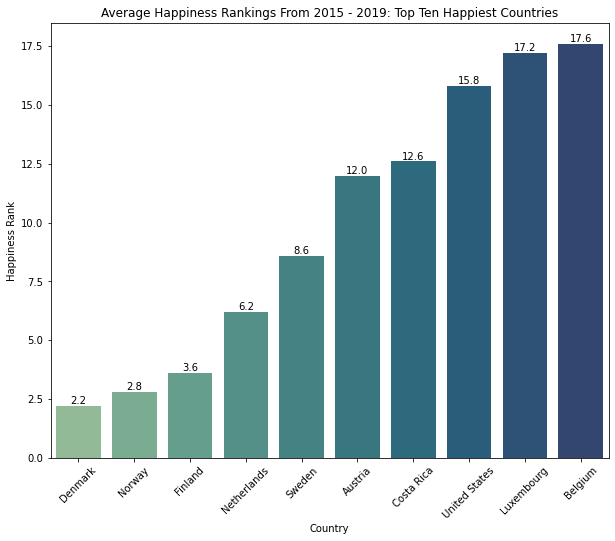

In [87]:
#top 10 happiest countries based on happiness_rank
data = clean_happy_gi_df.groupby(by=['country'])['happiness_rank'].mean().sort_values()[:10]
plt.figure(figsize=(10,8))
ax = sns.barplot(x=data.index, y=data, palette="crest")
plt.xlabel('Country')
plt.ylabel('Happiness Rank')
plt.xticks(rotation=45)
plt.bar_label(container=ax.containers[0], labels=data.values)
plt.title("Average Happiness Rankings From 2015 - 2019: Top Ten Happiest Countries");

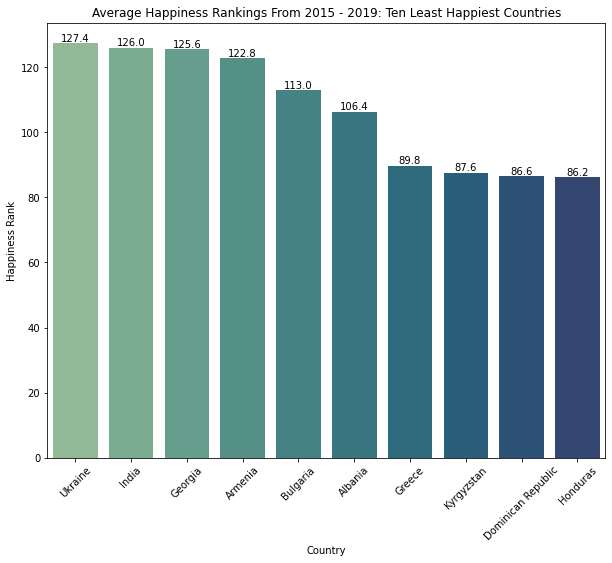

In [88]:
#10 least happiest countries based on happiness_rank
data = clean_happy_gi_df.groupby(by=['country'])['happiness_rank'].mean().sort_values(ascending=False)[:10]
plt.figure(figsize=(10,8))
ax = sns.barplot(x=data.index, y=data, palette="crest")
plt.xlabel('Country')
plt.ylabel('Happiness Rank')
plt.xticks(rotation=45)
plt.bar_label(container=ax.containers[0], labels=data.values)
plt.title("Average Happiness Rankings From 2015 - 2019: Ten Least Happiest Countries");

In [89]:
#Pulling top 5 happiest countries, the 5 least happiness countries
data = clean_happy_gi_df.groupby(by=['country'])['happiness_rank'].mean().sort_values()

#list to hold hold the targeted countries 
countries = []

#adding the happiest countries
countries.extend(list(data.index[:5]))

#adding 5 of the least happiest countries
countries.extend(list(data.index[-5:]))
print(countries)

['Denmark', 'Norway', 'Finland', 'Netherlands', 'Sweden', 'Bulgaria', 'Armenia', 'Georgia', 'India', 'Ukraine']


## Reminder: The lower the happiness score, the lower the happiness for the country

In [90]:
#creating dataframe of happiness score and gdp_per_capita index
data = (
    clean_happy_gi_df
    .loc[clean_happy_gi_df['country'].isin(countries)]
    .groupby(by=['country','year'])['happiness_score', 'gdp_per_capita']
    .mean()
)

data.head()

C:\Users\wilks\AppData\Local\Temp\ipykernel_10796\3001520630.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  clean_happy_gi_df


happiness_score  gdp_per_capita
country year                                 
Armenia 2015            4.350        0.768210
        2016            4.360        0.860860
        2017            4.376        0.900597
        2018            4.321        0.816000
        2019            4.559        0.850000

In [91]:
data = data.reset_index()
data.head()

,country,year,happiness_score,gdp_per_capita
0,Armenia,2015,4.350,0.768210
1,Armenia,2016,4.360,0.860860
2,Armenia,2017,4.376,0.900597
3,Armenia,2018,4.321,0.816000
4,Armenia,2019,4.559,0.850000


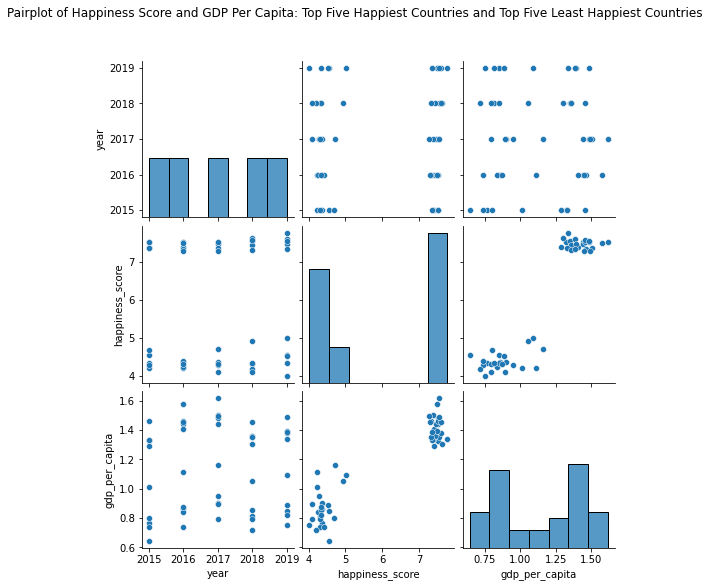

In [92]:
ax = sns.pairplot(data)
ax.fig.suptitle("Pairplot of Happiness Score and GDP Per Capita: Top Five Happiest Countries and Top Five Least Happiest Countries", y=1.08);

In [93]:
data.corr()

,year,happiness_score,gdp_per_capita
year,1.000000,0.023375,0.033029
happiness_score,0.023375,1.000000,0.937318
gdp_per_capita,0.033029,0.937318,1.000000


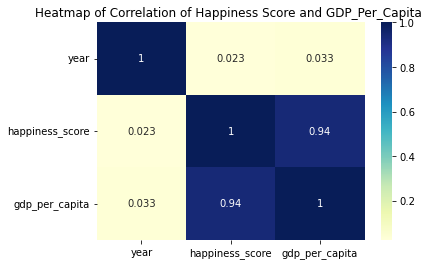

In [94]:
sns.heatmap(data=data.corr(),cmap="YlGnBu", annot=True)
plt.title("Heatmap of Correlation of Happiness Score and GDP_Per_Capita ");

In [95]:
pearsonr(
    data['happiness_score'], data['gdp_per_capita']
)


(0.93731762362058, 1.2891067746998141e-23)

In [96]:
pearsonr(clean_happy_df['happiness_score'], clean_happy_df['gdp_per_capita'])

(0.8008355476023052, 3.469234745118142e-144)

## +Reminder:The Gini index ranges from 0 (perfect equality) to 100 (complete inequality). +

In [97]:
#creating dataframe of happiness score and gini index
data = (
    clean_happy_gi_df
    .loc[(clean_happy_gi_df['income_indicator'] == 'Gini index') & (clean_happy_gi_df['country'].isin(countries))]
    .groupby(by=['country','year'])['happiness_score', 'income_indicator_value']
    .mean()
)

data.head()

C:\Users\wilks\AppData\Local\Temp\ipykernel_10796\1922849260.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  clean_happy_gi_df


happiness_score  income_indicator_value
country year                                         
Armenia 2015            4.350                    32.4
        2016            4.360                    32.5
        2017            4.376                    33.6
        2018            4.321                    34.4
        2019            4.559                    29.9

In [98]:
data = data.reset_index()
data.corr()

,year,happiness_score,income_indicator_value
year,1.000000,0.023375,0.021912
happiness_score,0.023375,1.000000,-0.616314
income_indicator_value,0.021912,-0.616314,1.000000


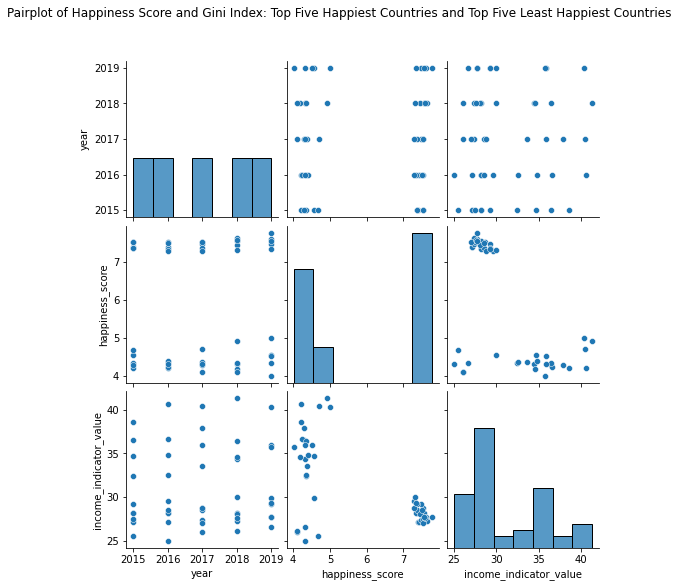

In [99]:
ax = sns.pairplot(data)
ax.fig.suptitle("Pairplot of Happiness Score and Gini Index: Top Five Happiest Countries and Top Five Least Happiest Countries", y=1.08);

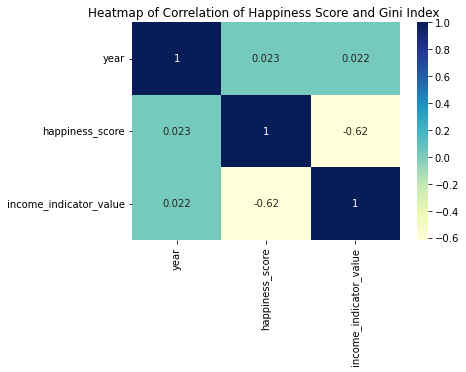

In [100]:
sns.heatmap(data=data.corr(),cmap="YlGnBu", annot=True)
plt.title("Heatmap of Correlation of Happiness Score and Gini Index ");

In [101]:
#running again with more countries to see if the p-value is above 0.05
pearsonr(
    data['happiness_score'], data['income_indicator_value']
)

#Strong correlation, but 

(-0.6163135290289613, 1.8883955987824013e-06)

In [102]:
#running again with more countries to see if the p-value is above 0.05
pearsonr(
    clean_happy_gi_df['happiness_score']
    .loc[(clean_happy_gi_df['income_indicator'] == 'Gini index')], 
    clean_happy_gi_df['income_indicator_value'].loc[(clean_happy_gi_df['income_indicator'] == 'Gini index')]
)

(-0.05804210317238166, 0.37574084972342975)

## Correlation between happiness score and Adjusted net national income (current $US)

In [103]:
data = (
    clean_happy_gi_df
    .loc[(clean_happy_gi_df['income_indicator'] == 'Adjusted net national income (current US$)') & (clean_happy_gi_df['country'].isin(countries))]
    .groupby(by=['country','year'])['happiness_score', 'income_indicator_value']
    .mean()
)

data.head()

C:\Users\wilks\AppData\Local\Temp\ipykernel_10796\2455218193.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  clean_happy_gi_df


happiness_score  income_indicator_value
country year                                         
Armenia 2015            4.350            9.466501e+09
        2016            4.360            9.300817e+09
        2017            4.376            1.035383e+10
        2018            4.321            1.094827e+10
        2019            4.559            1.189271e+10

In [104]:
data = data.reset_index()
data.corr()

,year,happiness_score,income_indicator_value
year,1.000000,0.023375,0.058989
happiness_score,0.023375,1.000000,-0.095727
income_indicator_value,0.058989,-0.095727,1.000000


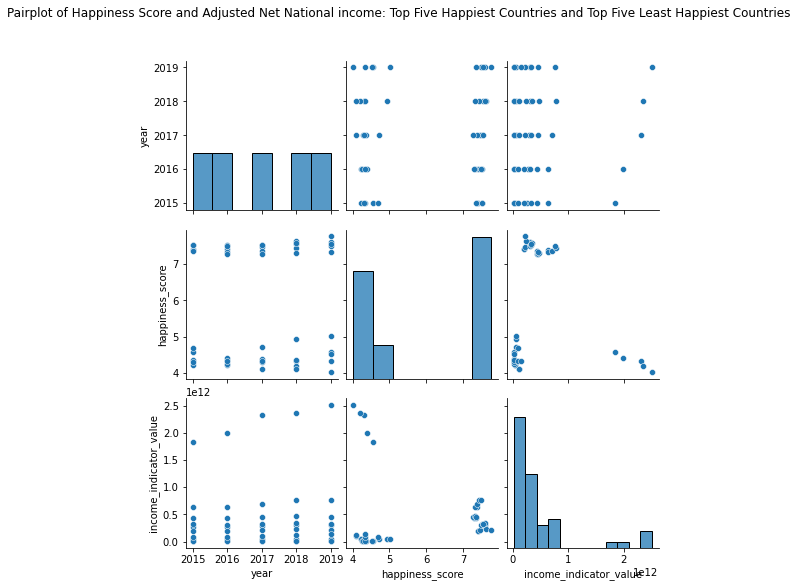

In [105]:
ax = sns.pairplot(data)
ax.fig.suptitle("Pairplot of Happiness Score and Adjusted Net National income: Top Five Happiest Countries and Top Five Least Happiest Countries", y=1.08);

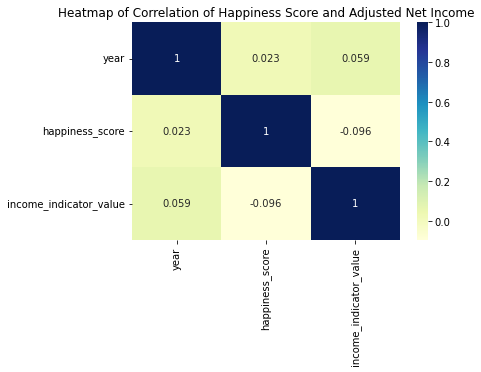

In [106]:
sns.heatmap(data=data.corr(),cmap="YlGnBu", annot=True)
plt.title("Heatmap of Correlation of Happiness Score and Adjusted Net Income");

In [107]:
pearsonr(
    data['happiness_score'], data['income_indicator_value']
)

(-0.09572683550236616, 0.5084252989231144)

In [108]:
#running again with more countries to see if the p-value is above 0.05
pearsonr(
    clean_happy_gi_df['happiness_score']
    .loc[(clean_happy_gi_df['income_indicator'] == 'Gini index')], 
    clean_happy_gi_df['income_indicator_value'].loc[(clean_happy_gi_df['income_indicator'] == 'Adjusted net national income (current US$)')]
)

(0.10549106379871256, 0.10673836919583546)

In [109]:
#correlation matrix of clean_happy_gi_df by year
data = clean_happy_gi_df.loc[clean_happy_gi_df['income_indicator'] == 'Gini index'].groupby(by=['year']).corr()
data

happiness_rank  happiness_score  \
year                                                                
2015 happiness_rank                     1.000000        -0.990232   
     happiness_score                   -0.990232         1.000000   
     gdp_per_capita                    -0.568843         0.605838   
     family_social_support             -0.663859         0.647536   
     health_life_expectancy            -0.467713         0.505384   
     freedom                           -0.697865         0.715743   
     trust_government_corruption       -0.536525         0.603360   
     generosity                        -0.467941         0.497469   
     income_indicator_value             0.033969        -0.056930   
2016 happiness_rank                     1.000000        -0.995112   
     happiness_score                   -0.995112         1.000000   
     gdp_per_capita                    -0.629519         0.653978   
     family_social_support             -0.667452         0.665430   
     health_life_expectancy            -0.489452         0.522316   
     freedom                           -0.691601         0.703534   
     trust_government_corruption       -0.578593         0.623874   
     generosity                        -0.406027         0.431252   
     income_indicator_value             0.034316        -0.050289   
2017 happiness_rank                     1.000000        -0.990896   
     happiness_score                   -0.990896         1.000000   
     gdp_per_capita                    -0.672516         0.684608   
     family_social_support             -0.647346         0.640997   
     health_life_expectancy            -0.518128         0.546593   
     freedom                           -0.634981         0.668530   
     trust_government_corruption       -0.571947         0.640492   
     generosity                        -0.278113         0.334994   
     income_indicator_value             0.032219        -0.063816   
2018 happiness_rank                     1.000000        -0.987853   
     happiness_score                   -0.987853         1.000000   
     gdp_per_capita                    -0.675938         0.697524   
     family_social_support             -0.693601         0.675964   
     health_life_expectancy            -0.605249         0.623112   
     freedom                           -0.600461         0.626822   
     trust_government_corruption       -0.568419         0.659523   
     generosity                        -0.269067         0.346909   
     income_indicator_value            -0.011593        -0.051616   
2019 happiness_rank                     1.000000        -0.984446   
     happiness_score                   -0.984446         1.000000   
     gdp_per_capita                    -0.673987         0.694234   
     family_social_support             -0.699799         0.685428   
     health_life_expectancy            -0.682424         0.694676   
     freedom                           -0.511399         0.549823   
     trust_government_corruption       -0.584483         0.681874   
     generosity                        -0.174107         0.246601   
     income_indicator_value            -0.003930        -0.059774   

                                  gdp_per_capita  family_social_support  \
year                                                                      
2015 happiness_rank                    -0.568843              -0.663859   
     happiness_score                    0.605838               0.647536   
     gdp_per_capita                     1.000000               0.545747   
     family_social_support              0.545747               1.000000   
     health_life_expectancy             0.810000               0.400788   
     freedom                            0.357746               0.457532   
     trust_government_corruption        0.461686               0.221132   
     generosity                         0.199056               0.320215   
     income_indicator_value            -

In [110]:
data.reset_index(inplace=True)
data.head()

,year,level_1,happiness_rank,happiness_score,gdp_per_capita,family_social_support,health_life_expectancy,freedom,trust_government_corruption,generosity,income_indicator_value
0,2015,happiness_rank,1.000000,-0.990232,-0.568843,-0.663859,-0.467713,-0.697865,-0.536525,-0.467941,0.033969
1,2015,happiness_score,-0.990232,1.000000,0.605838,0.647536,0.505384,0.715743,0.603360,0.497469,-0.056930
2,2015,gdp_per_capita,-0.568843,0.605838,1.000000,0.545747,0.810000,0.357746,0.461686,0.199056,-0.363901
3,2015,family_social_support,-0.663859,0.647536,0.545747,1.000000,0.400788,0.457532,0.221132,0.320215,-0.111967
4,2015,health_life_expectancy,-0.467713,0.505384,0.810000,0.400788,1.000000,0.335798,0.402670,0.159575,-0.335123


In [111]:
gdp_corr_2015 = data[data['year'] == 2015]
gdp_corr_2015

,year,level_1,happiness_rank,happiness_score,gdp_per_capita,family_social_support,health_life_expectancy,freedom,trust_government_corruption,generosity,income_indicator_value
0,2015,happiness_rank,1.000000,-0.990232,-0.568843,-0.663859,-0.467713,-0.697865,-0.536525,-0.467941,0.033969
1,2015,happiness_score,-0.990232,1.000000,0.605838,0.647536,0.505384,0.715743,0.603360,0.497469,-0.056930
2,2015,gdp_per_capita,-0.568843,0.605838,1.000000,0.545747,0.810000,0.357746,0.461686,0.199056,-0.363901
3,2015,family_social_support,-0.663859,0.647536,0.545747,1.000000,0.400788,0.457532,0.221132,0.320215,-0.111967
4,2015,health_life_expectancy,-0.467713,0.505384,0.810000,0.400788,1.000000,0.335798,0.402670,0.159575,-0.335123
5,2015,freedom,-0.697865,0.715743,0.357746,0.457532,0.335798,1.000000,0.633382,0.621063,0.076990
6,2015,trust_government_corruption,-0.536525,0.603360,0.461686,0.221132,0.402670,0.633382,1.000000,0.383857,-0.212145
7,2015,generosity,-0.467941,0.497469,0.199056,0.320215,0.159575,0.621063,0.383857,1.000000,-0.039628
8,2015,income_indicator_value,0.033969,-0.056930,-0.363901,-0.111967,-0.335123,0.076990,-0.212145,-0.039628,1.000000


In [112]:
#correlation matrix of happy_gi_master_df for 2015 (using Ginni index)
(
    clean_happy_gi_df
    .loc[(clean_happy_gi_df['income_indicator'] == 'Gini index') & 
         (clean_happy_gi_df['year'] == 2015) ].drop(columns='year').corr()
)

,happiness_rank,happiness_score,gdp_per_capita,family_social_support,health_life_expectancy,freedom,trust_government_corruption,generosity,income_indicator_value
happiness_rank,1.000000,-0.990232,-0.568843,-0.663859,-0.467713,-0.697865,-0.536525,-0.467941,0.033969
happiness_score,-0.990232,1.000000,0.605838,0.647536,0.505384,0.715743,0.603360,0.497469,-0.056930
gdp_per_capita,-0.568843,0.605838,1.000000,0.545747,0.810000,0.357746,0.461686,0.199056,-0.363901
family_social_support,-0.663859,0.647536,0.545747,1.000000,0.400788,0.457532,0.221132,0.320215,-0.111967
health_life_expectancy,-0.467713,0.505384,0.810000,0.400788,1.000000,0.335798,0.402670,0.159575,-0.335123
freedom,-0.697865,0.715743,0.357746,0.457532,0.335798,1.000000,0.633382,0.621063,0.076990
trust_government_corruption,-0.536525,0.603360,0.461686,0.221132,0.402670,0.633382,1.000000,0.383857,-0.212145
generosity,-0.467941,0.497469,0.199056,0.320215,0.159575,0.621063,0.383857,1.000000,-0.039628
income_indicator_value,0.033969,-0.056930,-0.363901,-0.111967,-0.335123,0.076990,-0.212145,-0.039628,1.000000


In [113]:
#correlation matrix of happy_gi_master_df for 2015 (using Adjusted net national income (current US$))
(
    clean_happy_gi_df
    .loc[(clean_happy_gi_df['income_indicator'] == 'Adjusted net national income (current US$)') & 
         (clean_happy_gi_df['year'] == 2015) ].drop(columns='year').corr()
)

,happiness_rank,happiness_score,gdp_per_capita,family_social_support,health_life_expectancy,freedom,trust_government_corruption,generosity,income_indicator_value
happiness_rank,1.000000,-0.990232,-0.568843,-0.663859,-0.467713,-0.697865,-0.536525,-0.467941,-0.126784
happiness_score,-0.990232,1.000000,0.605838,0.647536,0.505384,0.715743,0.603360,0.497469,0.138054
gdp_per_capita,-0.568843,0.605838,1.000000,0.545747,0.810000,0.357746,0.461686,0.199056,0.161458
family_social_support,-0.663859,0.647536,0.545747,1.000000,0.400788,0.457532,0.221132,0.320215,0.022857
health_life_expectancy,-0.467713,0.505384,0.810000,0.400788,1.000000,0.335798,0.402670,0.159575,0.112419
freedom,-0.697865,0.715743,0.357746,0.457532,0.335798,1.000000,0.633382,0.621063,0.137295
trust_government_corruption,-0.536525,0.603360,0.461686,0.221132,0.402670,0.633382,1.000000,0.383857,-0.005605
generosity,-0.467941,0.497469,0.199056,0.320215,0.159575,0.621063,0.383857,1.000000,0.179357
income_indicator_value,-0.126784,0.138054,0.161458,0.022857,0.112419,0.137295,-0.005605,0.179357,1.000000


In [114]:
#correlation matrix of happy_gi_master_df for 2015 (using Adjusted net national income (annual % growth))
(
    clean_happy_gi_df
    .loc[(clean_happy_gi_df['income_indicator'] == 'Adjusted net national income (annual % growth)') & 
         (clean_happy_gi_df['year'] == 2015) ].drop(columns='year').corr()
)

,happiness_rank,happiness_score,gdp_per_capita,family_social_support,health_life_expectancy,freedom,trust_government_corruption,generosity,income_indicator_value
happiness_rank,1.000000,-0.990232,-0.568843,-0.663859,-0.467713,-0.697865,-0.536525,-0.467941,0.148729
happiness_score,-0.990232,1.000000,0.605838,0.647536,0.505384,0.715743,0.603360,0.497469,-0.144308
gdp_per_capita,-0.568843,0.605838,1.000000,0.545747,0.810000,0.357746,0.461686,0.199056,-0.147958
family_social_support,-0.663859,0.647536,0.545747,1.000000,0.400788,0.457532,0.221132,0.320215,-0.187988
health_life_expectancy,-0.467713,0.505384,0.810000,0.400788,1.000000,0.335798,0.402670,0.159575,-0.034390
freedom,-0.697865,0.715743,0.357746,0.457532,0.335798,1.000000,0.633382,0.621063,0.010054
trust_government_corruption,-0.536525,0.603360,0.461686,0.221132,0.402670,0.633382,1.000000,0.383857,-0.205655
generosity,-0.467941,0.497469,0.199056,0.320215,0.159575,0.621063,0.383857,1.000000,0.169761
income_indicator_value,0.148729,-0.144308,-0.147958,-0.187988,-0.034390,0.010054,-0.205655,0.169761,1.000000


In [115]:
#calculating correlation and pvalue of happiness score and gini index with pearsonr method
pearsonr(
    clean_happy_gi_df['happiness_score'], clean_happy_gi_df['gdp_per_capita']
)

(0.6477794010668981, 0.0)

In [116]:
#calculating correlation and pvalue of happiness score and Adjusted net national income (current US$) with pearsonr method
pearsonr(
    clean_happy_gi_df['happiness_score']
    .loc[(clean_happy_gi_df['income_indicator'] == 'Adjusted net national income (current US$)')], 
    clean_happy_gi_df['income_indicator_value'].loc[(clean_happy_gi_df['income_indicator'] == 'Adjusted net national income (current US$)')]
)

(0.10549106379871256, 0.10673836919583546)

In [117]:
#Gross National Income (GNI) is the total amount of money earned by a nation's people and businesses. It is used to measure and track a nation's wealth from year to year. 
#calculating correlation and pvalue of happiness score and Adjusted net national income (annual % growth) with pearsonr method
pearsonr(
    clean_happy_gi_df['happiness_score']
    .loc[(clean_happy_gi_df['income_indicator'] == 'Gini index')], 
    clean_happy_gi_df['income_indicator_value'].loc[(clean_happy_gi_df['income_indicator'] == 'Gini index')]
)

(-0.05804210317238166, 0.37574084972342975)